In [1]:
import numpy as np
import pandas as pd
%pylab inline
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

Populating the interactive namespace from numpy and matplotlib


_Initial_
----------
-read the training dataset

-set seed

In [2]:
df = pd.read_csv("titanic/train.csv")
np.random.seed(100)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


use describe function to gather information about the dataset

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that there are some missing values in the Age column, so we need to fill in all the missing values.
for this we just use the mean of available data.

In [5]:
df.Age.fillna(df.Age.mean(), inplace =True)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

_Understanding the data_
==========================

We start with looking at the ratio of the passengers that survived vs those who didnt.

In [8]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

taking a look at the above data we can see that only 38.3838%  of people survived

In [9]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

We first breakdown the dataset into male and female, and see that the ratio of women to men is : 0.3524, which gives us something to go on

In [10]:
df[df.Sex == "female"].Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

Here, we can see that a majority of the females were able to survive.

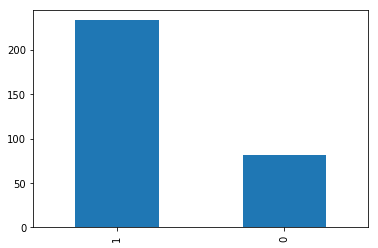

In [11]:
df[df.Sex == "female"].Survived.value_counts().plot(kind="bar")

In [12]:
df[df.Sex == "male"].Survived.value_counts()

0    468
1    109
Name: Survived, dtype: int64

Turns out the males weren't so lucky.

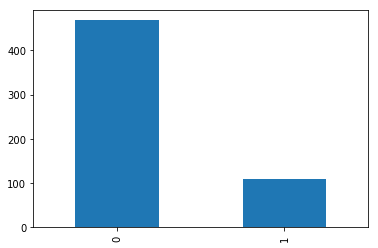

In [13]:
df[df.Sex == "male"].Survived.value_counts().plot(kind="bar")

In [14]:
df[df.Age<10].Survived.value_counts()

1    38
0    24
Name: Survived, dtype: int64

Now lets look at how many kids were able to survive.
Since there isnt a proper age to define kids i went with 10
We can see that for kids under the age of 10, more of them were able to survive.

Now lets look at the various survival and death numbers of all the passengers across all the ages.

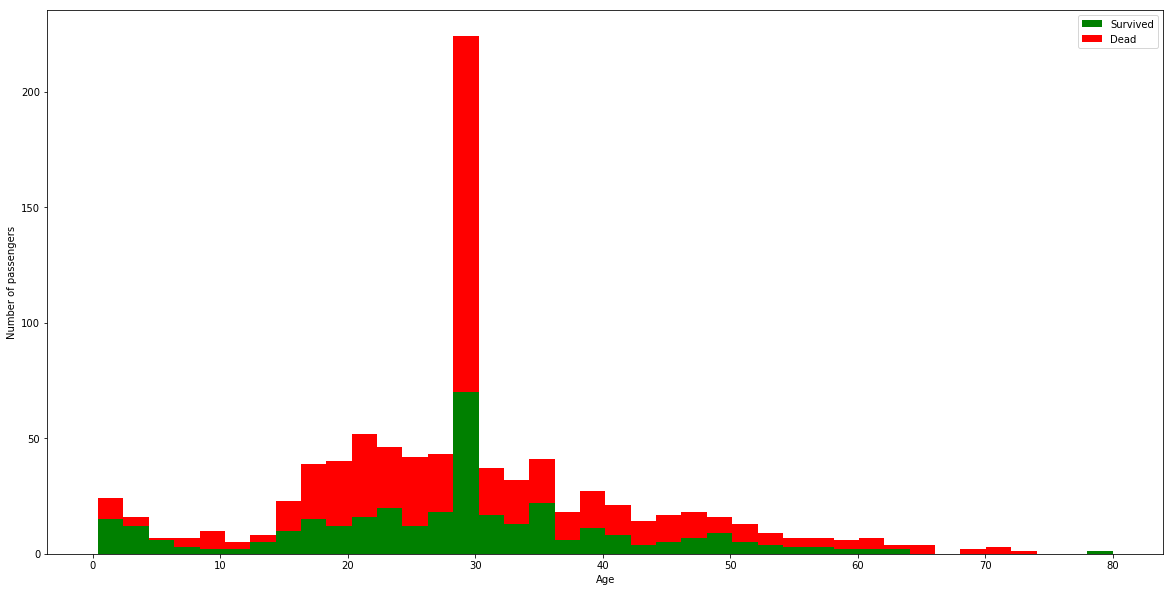

In [15]:
figure = plt.figure(figsize=(20,10))
plt.hist([df[df.Survived==1]['Age'],df[df.Survived==0]['Age']], stacked = True, color = ['g','r'], bins = 40, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()


We can see that there passengers below the age of 14 and above 54 have better chances of survival.

Now lets do the same, but will the fare the passengers paid and their survival rate.

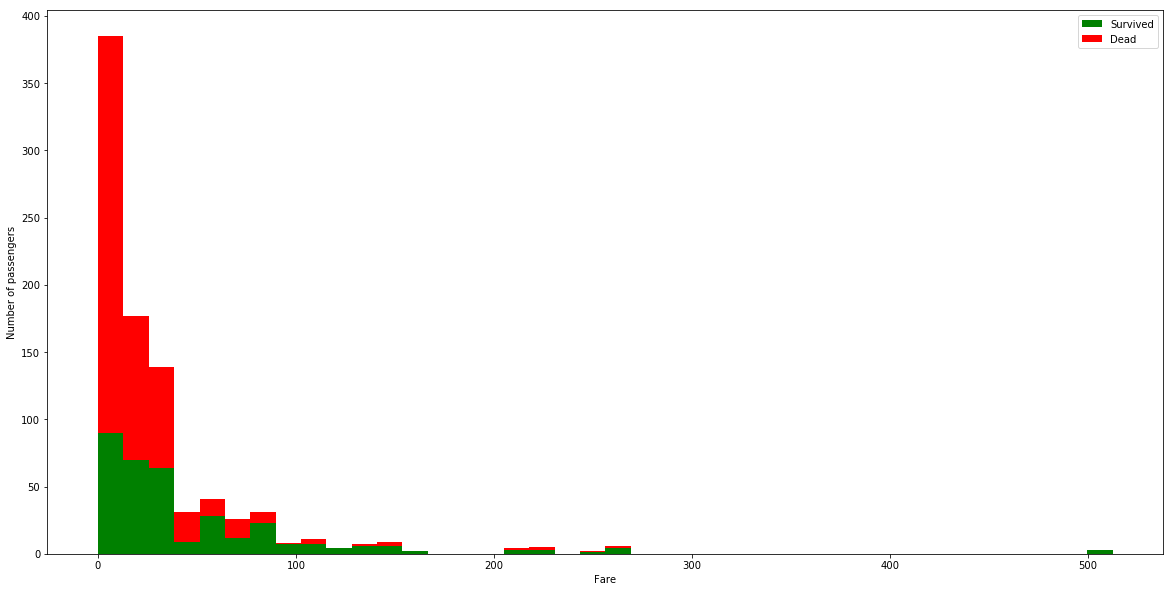

In [16]:
figure = plt.figure(figsize=(20,10))
plt.hist([df[df.Survived==1]['Fare'],df[df.Survived==0]['Fare']], stacked = True, color = ['g','r'], bins = 40, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

Looks liek the people that paid more for their ticket, which i am guessing were more important poeple and people from the higher class, had better survival ratios

This also leaves us to beleive that people that were in the more expensive cabins would have had a better survival chance, since peopel that paid similar price would be in rooms closer to each other

Now we split up the passengers according to the port they embarked from

In [17]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

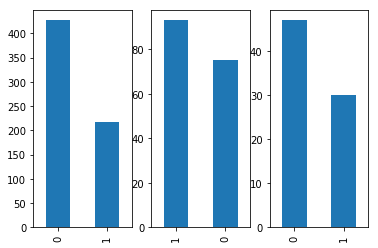

In [18]:
fig, axs = plt.subplots(1,3)
df[df.Embarked == "S"].Survived.value_counts().plot(kind="bar", ax=axs[0])
df[df.Embarked == "C"].Survived.value_counts().plot(kind="bar", ax=axs[1])
df[df.Embarked == "Q"].Survived.value_counts().plot(kind="bar", ax=axs[2])

Cant really seem to find too much of a relation here

Now lets see if we can find some relation using the sibblings or children columns

In [19]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

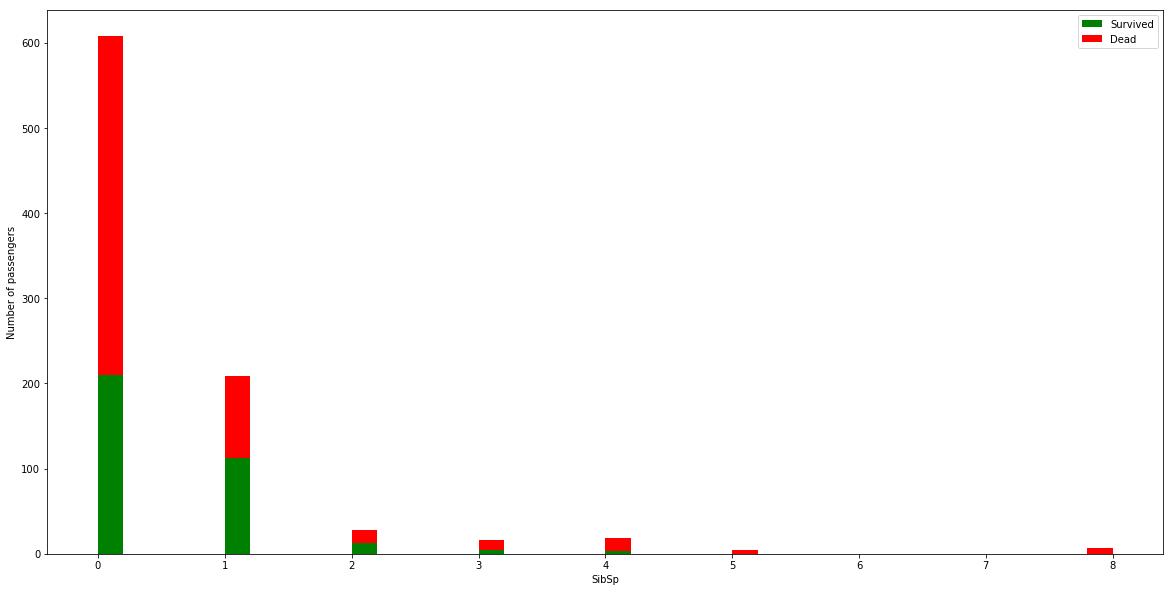

In [20]:
figure = plt.figure(figsize=(20,10))
plt.hist([df[df.Survived==1]['SibSp'],df[df.Survived==0]['SibSp']], stacked = True, color = ['g','r'], bins = 40, label = ['Survived','Dead'])
plt.xlabel('SibSp')
plt.ylabel('Number of passengers')
plt.legend()

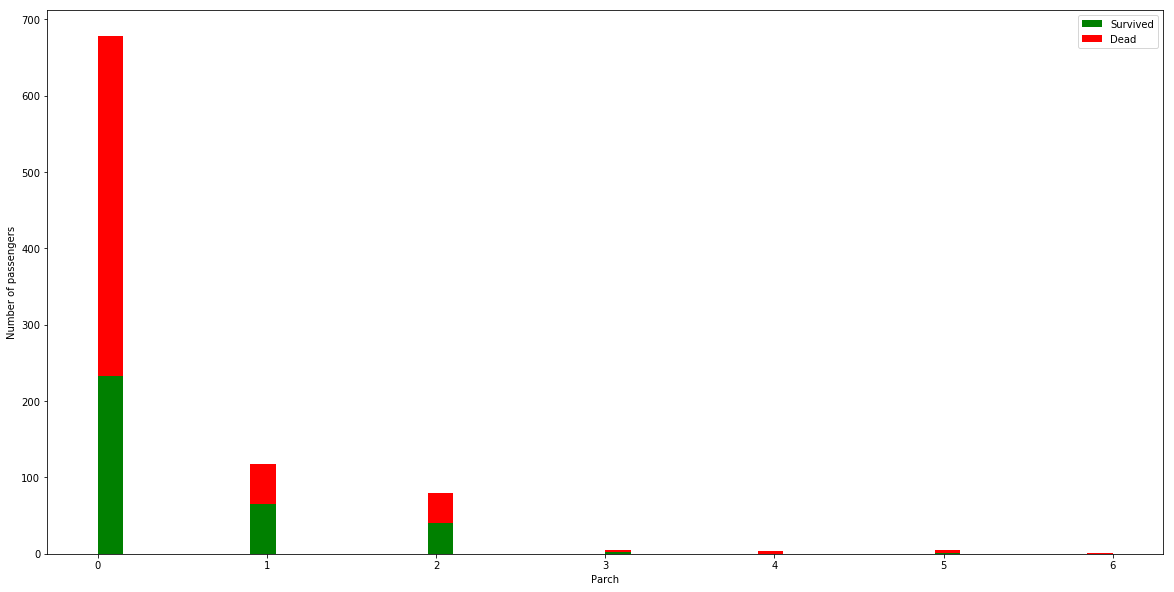

In [21]:
figure = plt.figure(figsize=(20,10))
plt.hist([df[df.Survived==1]['Parch'],df[df.Survived==0]['Parch']], stacked = True, color = ['g','r'], bins = 40, label = ['Survived','Dead'])
plt.xlabel('Parch')
plt.ylabel('Number of passengers')
plt.legend()

We cant really see a realtion here

The continuous data from the columns Name, TIcket and passengerid seems to not be helping so we remove it.

In [22]:
df.drop(["Name",'Ticket','PassengerId'], axis =1, inplace = True)

Now we try to change the presentation fo the data

In [23]:
def new_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
    
df.Cabin = df.Cabin.apply(new_cabin)

In [24]:
categorical_var = ['Sex', 'Cabin', 'Embarked']

for variable in categorical_var:
    df[variable].fillna("Missing", inplace = True)
    dummies = pd.get_dummies(df[variable], prefix =variable)
    df = pd.concat([df, dummies], axis =1)
    df.drop([variable], axis = 1, inplace=True)

In [25]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


Create the Y dataset from survived column for random forest

In [26]:
y = df.pop('Survived')

Performing Random forest regression on the above dataset

In [27]:
model = RandomForestRegressor(100, oob_score =True, n_jobs=1, random_state=42)
model.fit(df,y)
print  ("AUC score:", roc_auc_score(y,model.oob_prediction_))

AUC score: 0.863521128261


Lets look at the importance of the various predictors

In [28]:
importance = pd.Series(model.feature_importances_, index=df.columns)
importance.sort(ascending=False)
importance

C:\Users\aashe\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


Age                 0.238891
Fare                0.215048
Sex_male            0.158822
Sex_female          0.143423
Pclass              0.091138
SibSp               0.044357
Cabin_None          0.026774
Parch               0.021583
Embarked_S          0.015318
Embarked_C          0.010619
Cabin_E             0.008595
Cabin_C             0.006471
Embarked_Q          0.006004
Cabin_D             0.004310
Cabin_B             0.003791
Cabin_A             0.002953
Cabin_F             0.001024
Cabin_G             0.000812
Cabin_T             0.000066
Embarked_Missing    0.000000
dtype: float64

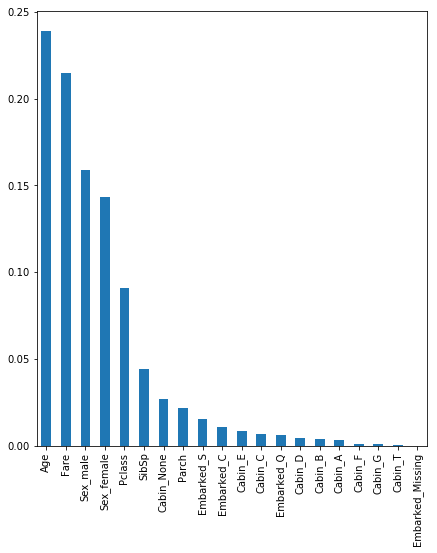

In [29]:
importance.plot(kind='bar', figsize=(7,8))

In [30]:
tot_importance_sex = importance.Sex_female+importance.Sex_male
print ('total importance of sex', tot_importance_sex)

total importance of sex 0.302245876424


In [31]:
tot_importance_cabin = importance.Cabin_A+importance.Cabin_B+importance.Cabin_C+importance.Cabin_D+importance.Cabin_E+importance.Cabin_F+importance.Cabin_G+importance.Cabin_T+importance.Cabin_None
print ('total importance of cabin', tot_importance_cabin)

total importance of cabin 0.0547966266694


Above are the totals of the parameters that were branched

We see that the most important parameters are:
    
    -Sex
    -Age
    -Pclass
    -Cabin
    ..

_Parameter testing_
===================

**n_jobs**

In [32]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(df,y)

1 loop, best of 3: 1.96 s per loop


In [33]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df,y)

1 loop, best of 3: 1.16 s per loop


**n_estimators**

10 trees result:
AUC score: 0.814625741646



C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


30 trees result:
AUC score: 0.853870407652

50 trees result:
AUC score: 0.860698345743

70 trees result:
AUC score: 0.861507898465

100 trees result:
AUC score: 0.863521128261

200 trees result:
AUC score: 0.862192290076

500 trees result:
AUC score: 0.863739494456

1000 trees result:
AUC score: 0.864043076726

2000 trees result:
AUC score: 0.863449227197



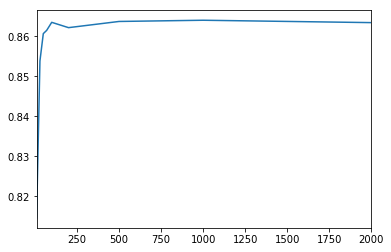

In [34]:
results=[]
n_estimators_numbers = [10, 30, 50,70,100,200,500,1000,2000]

for trees in n_estimators_numbers:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(df,y)
    print (trees, "trees result:")
    roc = roc_auc_score(y,model.oob_prediction_)
    print ('AUC score:', roc)
    results.append(roc)
    print("")
    
pd.Series(results, n_estimators_numbers).plot();

**max_features**

In [35]:
results=[]
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.1]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(df,y)
    print (max_features, "option result:")
    roc = roc_auc_score(y,model.oob_prediction_)
    print ('AUC score:', roc)
    results.append(roc)
    print("")
    


auto option result:
AUC score: 0.864043076726

None option result:
AUC score: 0.864043076726

sqrt option result:
AUC score: 0.86337466313

log2 option result:
AUC score: 0.86337466313

0.9 option result:
AUC score: 0.863534443273

0.1 option result:
AUC score: 0.860900733923



**min_sample_leaf**

1 min sample option result:
AUC score: 0.864043076726

2 min sample option result:
AUC score: 0.869654022731

3 min sample option result:
AUC score: 0.871571384442

4 min sample option result:
AUC score: 0.873478094142

5 min sample option result:
AUC score: 0.874269005848

6 min sample option result:
AUC score: 0.874029335634

7 min sample option result:
AUC score: 0.873304998988

8 min sample option result:
AUC score: 0.871866977705

9 min sample option result:
AUC score: 0.869294517411

10 min sample option result:
AUC score: 0.867430415748



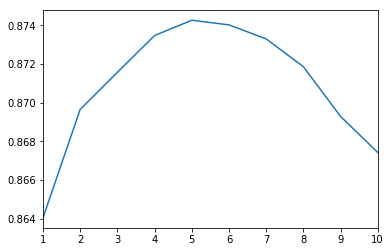

In [36]:
results=[]
min_sample_leaf_options = [1,2,3,4,5,6,7,8,9,10]

for min_samples in min_sample_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=min_samples)
    model.fit(df,y)
    print (min_samples, "min sample option result:")
    roc = roc_auc_score(y,model.oob_prediction_)
    print ('AUC score:', roc)
    results.append(roc)
    print("")
    
pd.Series(results, min_sample_leaf_options).plot();

**Final Score**
===============

In [37]:
model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=5)
model.fit(df,y)
roc = roc_auc_score(y,model.oob_prediction_)
print ('AUC score:', roc)

AUC score: 0.874269005848


**Conclusion**

Now we can use the above parameters on the the test dataset and submit it to Kaggle to get a score **!!!**